In [1]:
import pandas as pd
import matplotlib.pyplot as plt
bike_sharing_df = pd.read_csv('Bike-Sharing-Dataset/day.csv')
col_names = list(bike_sharing_df.columns)
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [2]:
BS_df = bike_sharing_df[['casual','registered','cnt']]

In [3]:
BS_df.head()

,casual,registered,cnt
0,331,654,985
1,131,670,801
2,120,1229,1349
3,108,1454,1562
4,82,1518,1600


## Q1
Plot a heatmap of Pearson correlation matrix of dataset columns. Report which
features have the highest absolute correlation with the target variable and what
that implies.

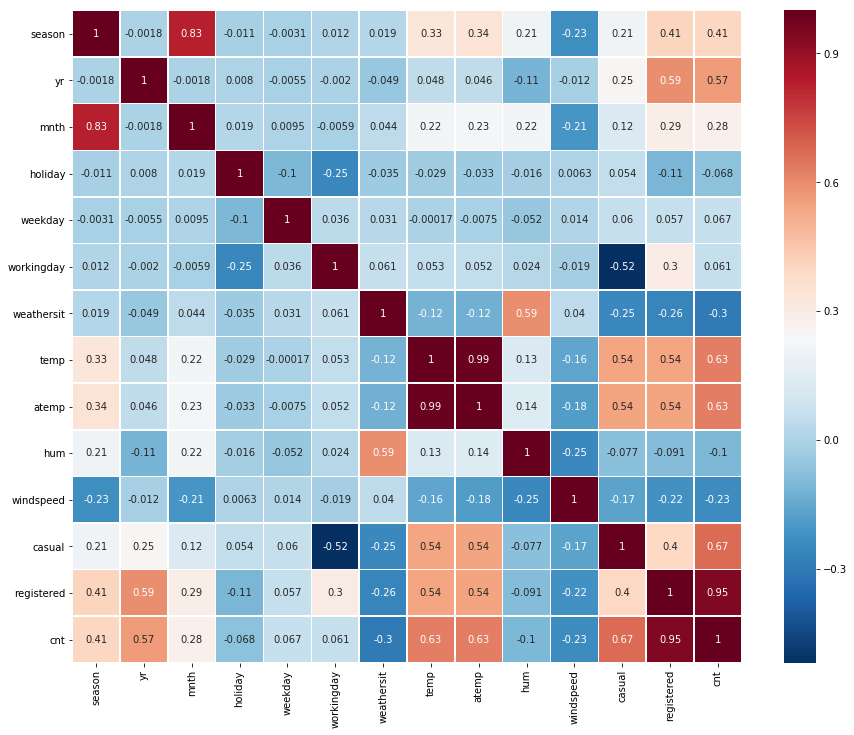

In [4]:
import seaborn as sns
corr = bike_sharing_df.iloc[:,1:].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr, linewidths=0.5,cmap="RdBu_r",annot=True)

## Q2
Plot the histogram of numerical features. What preprocessing can be done if the
distribution of a feature has high skewness?

temp


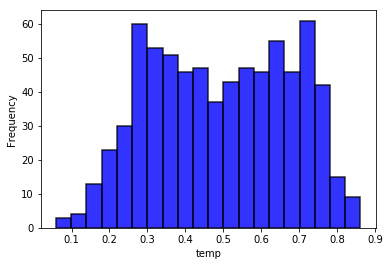

atemp


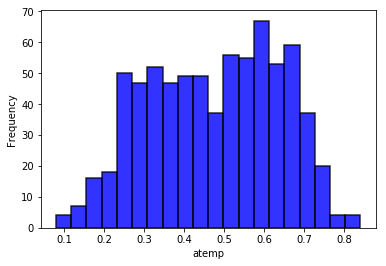

hum


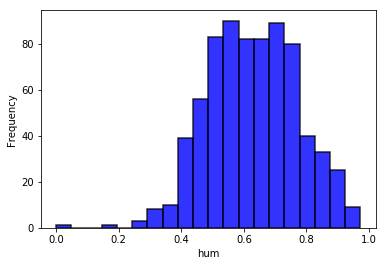

windspeed


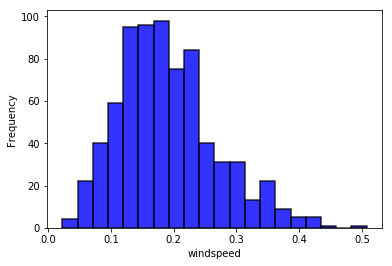

In [5]:
import matplotlib.pyplot as plt

numerical_features = ['temp','atemp','hum','windspeed']
for i in numerical_features:
    print(i)
    plt.hist(bike_sharing_df[i],bins=20, edgecolor='k', facecolor='b', linewidth=1.5, alpha=0.8)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

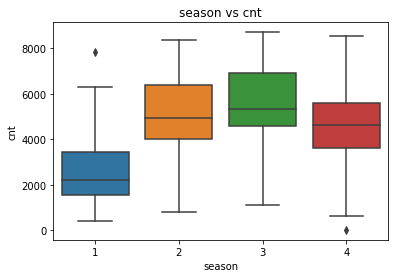

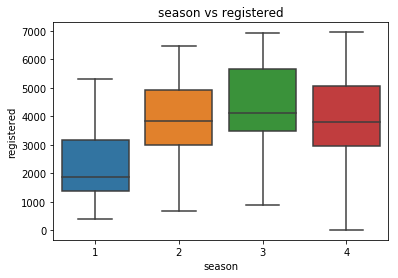

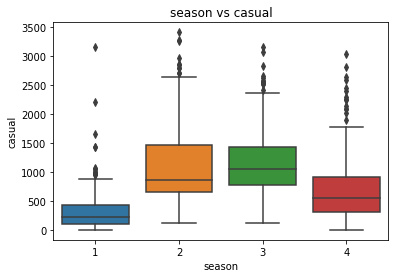

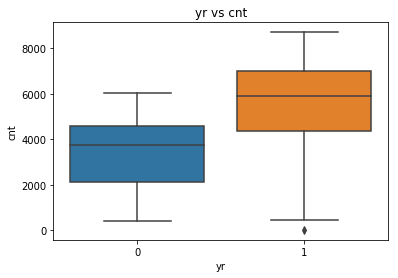

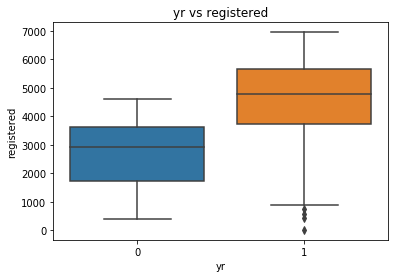

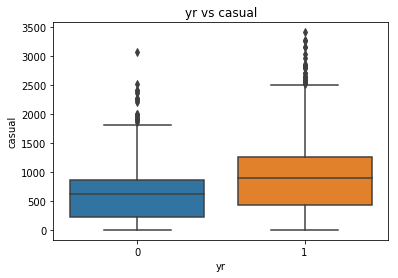

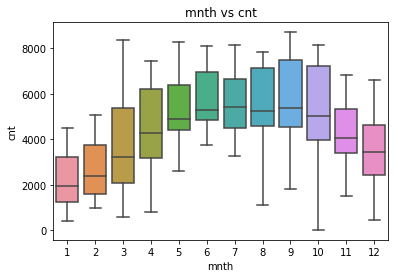

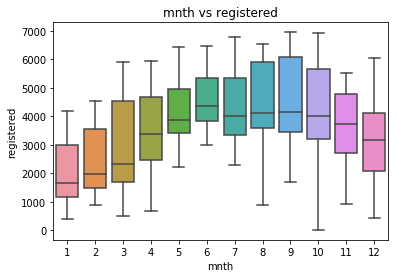

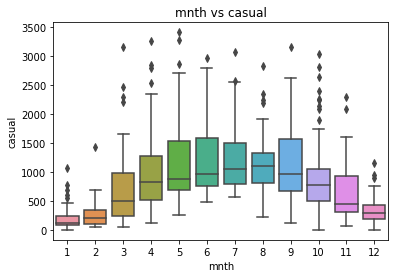

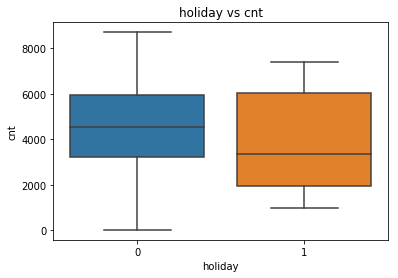

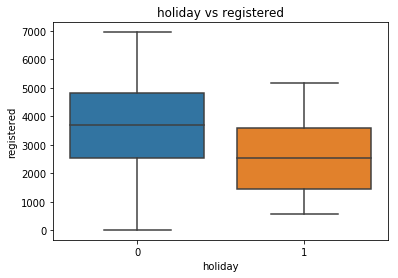

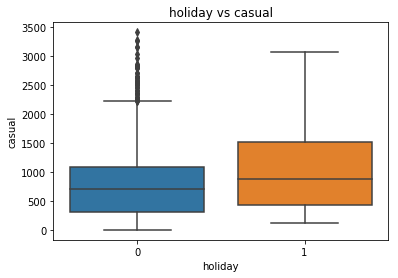

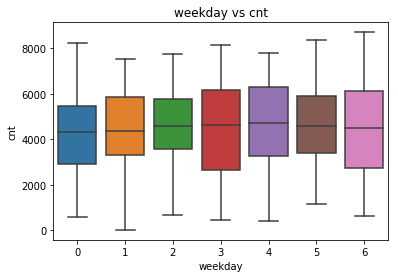

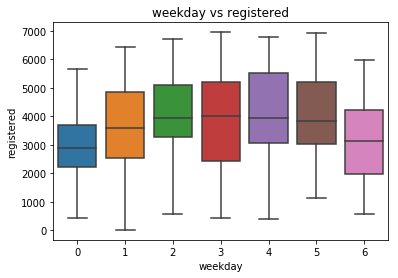

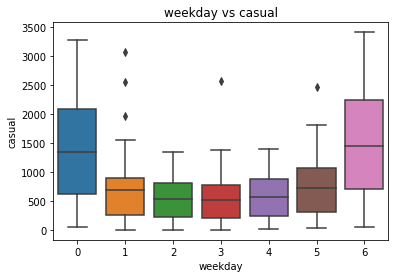

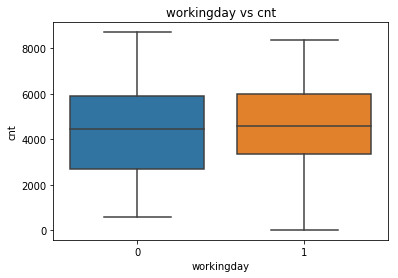

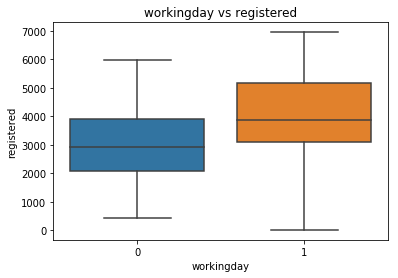

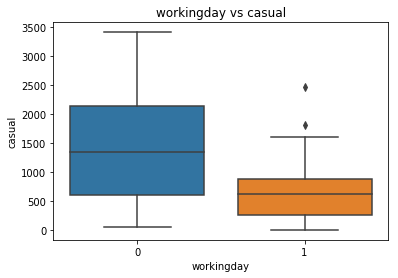

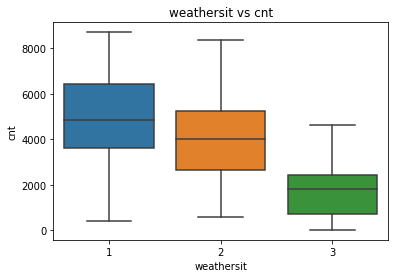

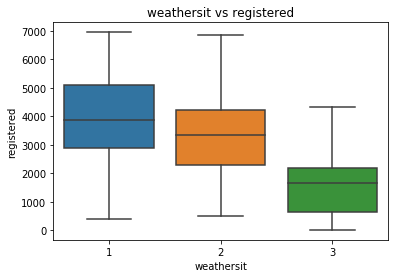

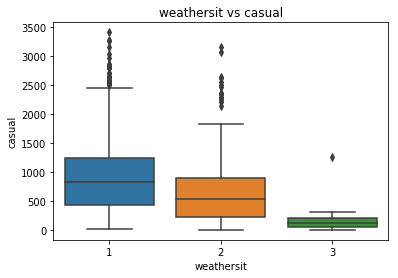

In [6]:
import seaborn as sb
categorical_features = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
for i in categorical_features:
    for j in range(1,4):
        sb.boxplot(bike_sharing_df[i], bike_sharing_df.iloc[:,-j], order=list(set(bike_sharing_df[i])))
        plt.title(i +' vs '+ col_names[-j])
        plt.show()

In [7]:
month_cnt = [bike_sharing_df['cnt'][0]]
months = []
for i in range(1,bike_sharing_df.shape[0]):
    if bike_sharing_df['mnth'][i] == bike_sharing_df['mnth'][i-1]:
        month_cnt.append(bike_sharing_df['cnt'][i])
    else:
        months.append(month_cnt)
        month_cnt = [bike_sharing_df['cnt'][i]]       

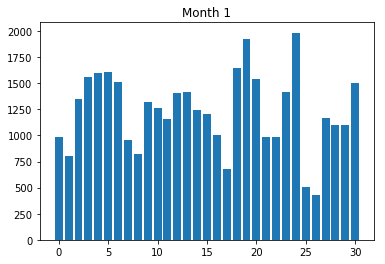

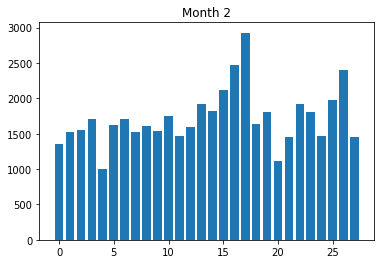

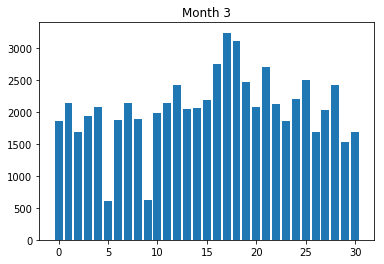

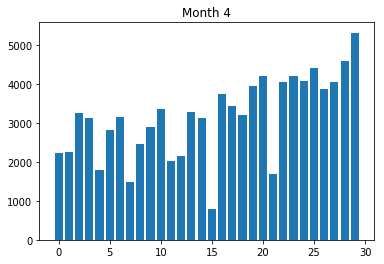

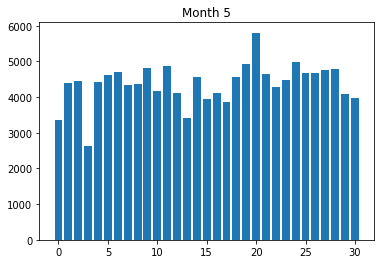

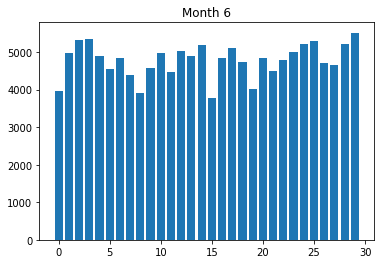

In [8]:
import numpy as np
for i in range(6):
    plt.title('Month ' + str(i+1))
    plt.bar(range(len(months[i])),months[i])
    plt.show()

## Q6
Handling Categorical Features

Categorical feature in Bike Sharing dataset is dteday, which can be represented as day difference by instant. Therefore, we ingore this categorical feature.

In [9]:
bs_temp = bike_sharing_df.drop(['instant','dteday'], axis=1)
ys = bs_temp.iloc[:,-1]
bs_temp = bs_temp.iloc[:,:-3]
xs_scalar = bs_temp
weekday_onehot = pd.get_dummies(bs_temp['weekday'],prefix='weekday')
season_onehot = pd.get_dummies(bs_temp['season'],prefix='season')
mnth_onehot = pd.get_dummies(bs_temp['mnth'],prefix='mnth')
weathersit_onehot = pd.get_dummies(bs_temp['weathersit'],prefix='weathersit')

xs_onehot = pd.concat([bs_temp,weekday_onehot,season_onehot,mnth_onehot,weathersit_onehot], axis=1).drop(['weekday','season','mnth','weathersit'],axis=1)
xs_onehot

,yr,holiday,workingday,temp,atemp,hum,windspeed,weekday_0,weekday_1,weekday_2,...,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_1,weathersit_2,weathersit_3
0,0,0,0,0.344167,0.363625,0.805833,0.160446,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0.363478,0.353739,0.696087,0.248539,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0.196364,0.189405,0.437273,0.248309,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0.200000,0.212122,0.590435,0.160296,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0.226957,0.229270,0.436957,0.186900,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,1,0.204348,0.233209,0.518261,0.089565,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0,0,1,0.196522,0.208839,0.498696,0.168726,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0.165000,0.162254,0.535833,0.266804,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0.138333,0.116175,0.434167,0.361950,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0,0,1,0.150833,0.150888,0.482917,0.223267,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
xs_scalar

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900
5,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565
6,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726
7,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804
8,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950
9,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267


## Q7

In [11]:
from sklearn import preprocessing
from sklearn.feature_selection import mutual_info_regression, f_regression
xs_scalar_standard = preprocessing.scale(xs_scalar)
xs_onehot_standard = preprocessing.scale(xs_onehot)


In [12]:
# select 5 most important variables 
MutualInfo_scalar = mutual_info_regression(xs_scalar_standard,ys)
Fscore_scalar = f_regression(xs_scalar_standard, ys)
MutualInfo_onehot = mutual_info_regression(xs_onehot_standard,ys)
Fscore_onehot = f_regression(xs_onehot_standard, ys)

top5_MI_scalar = np.argsort(MutualInfo_scalar)[::-1][:5]
top5_FS_scalar = np.argsort(Fscore_scalar[0])[::-1][:5]
top5_MI_onehot = np.argsort(MutualInfo_onehot)[::-1][:5]
top5_FS_onehot = np.argsort(Fscore_onehot[0])[::-1][:5]

xs_top5_MI_scalar = xs_scalar.iloc[:, top5_MI_scalar]
xs_top5_FS_scalar = xs_scalar.iloc[:, top5_FS_scalar]
xs_top5_MI_onehot = xs_onehot.iloc[:, top5_MI_onehot]
xs_top5_FS_onehot = xs_onehot.iloc[:, top5_FS_onehot]

In [13]:
xs_top5_MI = xs_top5_MI_onehot
xs_top5_FS = xs_top5_FS_onehot

## Linear Regression

In [14]:
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

pipe_lr_standard = Pipeline([
    ('standardize', preprocessing.StandardScaler()),
    ('model', LinearRegression())
])

pipe_lr_nonstandard = Pipeline([
    ('model', LinearRegression())
])

lr_train_score = []
lr_test_score = []

cv_results = cross_validate(pipe_lr_nonstandard, xs_top5_FS_onehot, ys, scoring='neg_root_mean_squared_error', 
                            return_train_score=True, cv=10)
lr_train_score.append(np.mean(cv_results['train_score']))
lr_test_score.append(np.mean(cv_results['test_score']))
cv_results = cross_validate(pipe_lr_standard, xs_top5_FS_onehot, ys, scoring='neg_root_mean_squared_error', 
                            return_train_score=True, cv=10)
lr_train_score.append(np.mean(cv_results['train_score']))
lr_test_score.append(np.mean(cv_results['test_score']))

In [15]:
lr_results = pd.DataFrame(data={'mean_test_score': lr_test_score, 'mean_train_score': lr_train_score,
                                'param_model': 'LinearRegression()', 'param_model__alpha': 'NA', 
                                'Standardize': [False, True]})

In [16]:
lr_results

,mean_test_score,mean_train_score,param_model,param_model__alpha,Standardize
0,-1017.715043,-973.625571,LinearRegression(),NA,False
1,-1017.715043,-973.625571,LinearRegression(),NA,True


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso

pipe_standard = Pipeline([
    ('standardize', preprocessing.StandardScaler()),
    ('model', LinearRegression())
])

pipe_nonstandard = Pipeline([
    ('model', LinearRegression())
])

param_grid = {
    'model': [Ridge(random_state=42, max_iter=10000), Lasso(random_state=42, max_iter=10000)],
    'model__alpha': [10.0**x for x in np.arange(-3,4)]
}

In [18]:
grid1 = GridSearchCV(pipe_nonstandard, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(xs_top5_FS, ys)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    2.1s finished


In [19]:
grid2 = GridSearchCV(pipe_standard, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(xs_top5_FS, ys)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.6s finished


In [20]:
lr_reg_result1 = pd.DataFrame(grid1.cv_results_)[['mean_test_score', 'mean_train_score', 'param_model', 'param_model__alpha']]
lr_reg_result1['Standardize'] = False

lr_reg_result2 = pd.DataFrame(grid2.cv_results_)[['mean_test_score', 'mean_train_score', 'param_model', 'param_model__alpha']]
lr_reg_result2['Standardize'] = True

In [21]:
results = pd.concat([lr_results, lr_reg_result1, lr_reg_result2])
results = results.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
results

,mean_test_score,mean_train_score,param_model,param_model__alpha,Standardize
0,-989.841732,-990.567256,"Ridge(alpha=100.0, copy_X=True, fit_intercept=...",10,False
1,-992.981214,-988.288295,"Ridge(alpha=100.0, copy_X=True, fit_intercept=...",100,True
2,-998.532721,-986.356699,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",100,True
3,-1000.667897,-977.409466,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",10,False
4,-1002.730614,-975.108501,"Ridge(alpha=100.0, copy_X=True, fit_intercept=...",1,False
5,-1004.473824,-974.447499,"Ridge(alpha=100.0, copy_X=True, fit_intercept=...",10,True
6,-1006.881704,-974.018581,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",10,True
7,-1009.178698,-973.923033,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",1,False
8,-1009.859563,-973.968975,"Ridge(alpha=100.0, copy_X=True, fit_intercept=...",0.1,False
9,-1013.215210,-973.694229,"Ridge(alpha=100.0, copy_X=True, fit_intercept=...",1,True


In [22]:
import statsmodels.api as sm
 
lm_fit = sm.OLS(ys, sm.add_constant(xs_onehot)).fit()
print(lm_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     140.3
Date:                Sat, 07 Mar 2020   Prob (F-statistic):          8.67e-266
Time:                        08:45:21   Log-Likelihood:                -5880.2
No. Observations:                 731   AIC:                         1.182e+04
Df Residuals:                     702   BIC:                         1.195e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1019.6079    148.110      6.884   

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [23]:
lm_fit.pvalues

const            1.291438e-11
yr              2.294966e-154
holiday          2.575233e-01
workingday       2.896613e-11
temp             4.152649e-02
atemp            2.222607e-01
hum              2.013660e-07
windspeed        2.091887e-11
weekday_0        6.595401e-02
weekday_1        2.725026e-01
weekday_2        7.741005e-01
weekday_3        2.039693e-01
weekday_4        1.748603e-01
weekday_5        3.959554e-02
weekday_6        1.483723e-13
season_1         2.656985e-06
season_2         9.671326e-03
season_3         4.188569e-02
season_4         6.407070e-15
mnth_1           1.286778e-01
mnth_2           4.217047e-01
mnth_3           2.533052e-02
mnth_4           2.151364e-01
mnth_5           3.267647e-03
mnth_6           1.002822e-01
mnth_7           2.031799e-01
mnth_8           2.932908e-01
mnth_9           8.327337e-08
mnth_10          9.782034e-02
mnth_11          2.110197e-02
mnth_12          1.352225e-02
weathersit_1     5.481062e-52
weathersit_2     6.510439e-18
weathersit

## Polynomial Regression

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge

pipe_poly = Pipeline([
    ('poly_transform', PolynomialFeatures()),
    ('standardize', StandardScaler()),
    ('model', Ridge(alpha=10, random_state=42, max_iter=10000))
])

param_grid = {
    'poly_transform__degree': np.arange(1,11,1)
}

In [25]:
grid_poly = GridSearchCV(pipe_poly, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                         scoring='neg_root_mean_squared_error', return_train_score=True).fit(xs_top5_FS, ys)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.1s finished


In [26]:
poly_result = pd.DataFrame(grid_poly.cv_results_)[['mean_test_score', 'mean_train_score', 'param_poly_transform__degree']]
poly_result

,mean_test_score,mean_train_score,param_poly_transform__degree
0,-1004.473824,-974.447499,1
1,-1026.766218,-924.047856,2
2,-1017.732154,-887.994191,3
3,-979.704850,-875.538387,4
4,-972.637264,-870.864167,5
5,-974.865135,-868.359044,6
6,-974.880596,-866.738034,7
7,-974.072840,-865.357549,8
8,-978.441202,-863.969742,9
9,-992.962780,-862.487829,10


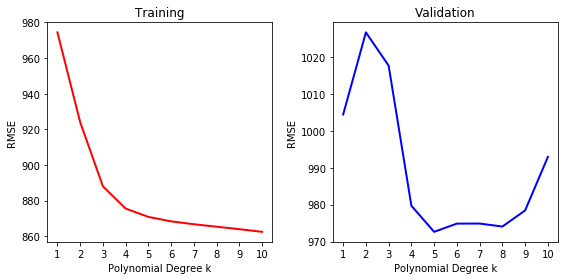

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.plot(poly_result['param_poly_transform__degree'], -poly_result['mean_train_score'], linewidth=2, color='r')
plt.xticks(np.arange(1,11))
plt.xlabel('Polynomial Degree k')
plt.ylabel('RMSE')
plt.title('Training')

plt.subplot(1,2,2)
plt.plot(poly_result['param_poly_transform__degree'], -poly_result['mean_test_score'], linewidth=2, color='b')
plt.title('Validation')
plt.xticks(np.arange(1,11))
plt.xlabel('Polynomial Degree k')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()

In [28]:
poly_optimal = Ridge(alpha=10, random_state=42, max_iter=1000).fit(PolynomialFeatures(5).fit_transform(xs_top5_FS), ys)

In [29]:
np.argsort(poly_optimal.coef_)[::-1]

array([  2,   1,  11,   7,   6,  40,  12, 216, 101,  30, 181,   8,  81,
       231, 111,  46,  15,   3,  36,  26,  22,  21,  41, 102, 217, 219,
       222, 104, 187, 184, 182,  84,  82,  31,  96, 209, 207,  76, 172,
       174, 154, 152,  66,  38, 212,  98,  78, 177,  28,  24, 157,  68,
        23,  65, 151, 201, 166, 146, 136, 203,  93,  37,  95, 206, 168,
        73,  63, 148, 138,  59, 171,  27,  75,  87,  33, 191,   9, 226,
       107,  13,  43, 198, 163, 143, 133, 129, 115, 113, 119, 118, 116,
       120, 238, 239, 236, 244, 245, 235, 233, 243, 240, 242,  48,  50,
        51,  17,   0, 137, 147, 167, 202,  32, 189, 188, 190,  83, 186,
       185, 183,  86,  85, 130, 134, 144, 164, 199,  67, 156, 155, 153,
       224, 225, 106, 105, 218, 103, 221, 220, 223,  42,  77, 175, 173,
       176,  97, 208, 210, 211, 140, 139,  60,  64, 150, 149, 170, 169,
        74, 205, 204,  94,  20,  19,   5, 247,  55,  54,  53, 125, 124,
       250, 248, 249, 251, 123, 122, 160, 158, 159,  70,  69,  2

## Neural Network

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

# tune the number of neurons for the first hidden layer
pipe_hidden_layer1 = Pipeline([
    ('standardize', StandardScaler()),
    ('model', MLPRegressor(random_state=42, max_iter=2000))
])

param_grid = {
    'model__hidden_layer_sizes': [(x,) for x in np.arange(1, 51)]
}


grid_hidden_layer1 = GridSearchCV(pipe_hidden_layer1, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                                  scoring='neg_root_mean_squared_error', return_train_score=True).fit(xs_onehot, ys)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   53.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 10.9min finished
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [31]:
nn1_results = pd.DataFrame(grid_hidden_layer1.cv_results_)[['mean_test_score', 'mean_train_score', 'param_model__hidden_layer_sizes']]
nn1_results = nn1_results.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
nn1_results.head()

,mean_test_score,mean_train_score,param_model__hidden_layer_sizes
0,-1371.470795,-935.925972,"(39,)"
1,-1372.937451,-946.775557,"(48,)"
2,-1391.738423,-1013.554531,"(43,)"
3,-1415.151478,-955.483088,"(49,)"
4,-1418.274939,-1079.559636,"(44,)"


In [32]:
# tune the number of neurons for the second hidden layer
pipe_hidden_layer2 = Pipeline([
    ('standardize', StandardScaler()),
    ('model', MLPRegressor(random_state=42, max_iter=2000))
])

param_grid = {
    'model__hidden_layer_sizes': [(39,x) for x in np.arange(1, 51)]
}


grid_hidden_layer2 = GridSearchCV(pipe_hidden_layer2, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                                  scoring='neg_root_mean_squared_error', return_train_score=True).fit(xs_onehot, ys)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 19.8min finished
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [33]:
nn2_results = pd.DataFrame(grid_hidden_layer2.cv_results_)[['mean_test_score', 'mean_train_score', 'param_model__hidden_layer_sizes']]
nn2_results = nn2_results.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
nn2_results.head()

,mean_test_score,mean_train_score,param_model__hidden_layer_sizes
0,-833.175716,-420.330883,"(39, 42)"
1,-847.808624,-422.228957,"(39, 41)"
2,-848.178170,-417.818066,"(39, 49)"
3,-849.504538,-463.729840,"(39, 20)"
4,-851.625609,-425.946684,"(39, 40)"


In [34]:
# tune the regularization term
pipe_reg = Pipeline([
    ('standardize', StandardScaler()),
    ('model', MLPRegressor(hidden_layer_sizes=(39,42), random_state=42, max_iter=2000))
])

param_grid = {
    'model__alpha': [10.0**x for x in np.arange(-3,4)]
}


grid_reg = GridSearchCV(pipe_reg, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                        scoring='neg_root_mean_squared_error', return_train_score=True).fit(xs_onehot, ys)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  4.8min finished
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [35]:
nnreg_results = pd.DataFrame(grid_reg.cv_results_)[['mean_test_score', 'mean_train_score', 'param_model__alpha']]
nnreg_results = nnreg_results.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
nnreg_results

,mean_test_score,mean_train_score,param_model__alpha
0,-831.822559,-420.913948,0.001
1,-833.707344,-420.012518,0.1
2,-834.264457,-421.378254,0.01
3,-837.478613,-420.455306,1
4,-840.436903,-416.662118,10
5,-845.716879,-410.068624,100
6,-853.090968,-403.090369,1000


## Random Forest

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

pipe_num_features = Pipeline([
    ('standardize', StandardScaler()),
    ('model', RandomForestRegressor(random_state=42))
])

param_grid = {
    'model__max_features': np.arange(0.1,1.1,0.1)
}

grid_num_features = GridSearchCV(pipe_num_features, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                                 scoring='neg_root_mean_squared_error', 
                                 return_train_score=True).fit(xs_onehot, ys)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.4s finished


In [37]:
rf_features_results = pd.DataFrame(grid_num_features.cv_results_)[['mean_test_score', 'mean_train_score', 'param_model__max_features']]
rf_features_results = rf_features_results.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
rf_features_results.head()

,mean_test_score,mean_train_score,param_model__max_features
0,-841.396709,-248.544876,0.4
1,-860.445380,-248.996354,0.6
2,-865.576280,-249.588495,0.5
3,-876.123119,-251.875729,0.7
4,-881.784512,-253.394618,0.9


In [38]:
pipe_num_trees = Pipeline([
    ('standardize', StandardScaler()),
    ('model', RandomForestRegressor(max_features=0.4, random_state=42))
])

param_grid = {
    'model__n_estimators': np.arange(10, 210, 10)
}

grid_num_trees = GridSearchCV(pipe_num_trees, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                                 scoring='neg_root_mean_squared_error', 
                                 return_train_score=True).fit(xs_onehot, ys)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   26.0s finished


In [39]:
rf_trees_results = pd.DataFrame(grid_num_trees.cv_results_)[['mean_test_score', 'mean_train_score', 'param_model__n_estimators']]
rf_trees_results = rf_trees_results.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
rf_trees_results

,mean_test_score,mean_train_score,param_model__n_estimators
0,-827.957587,-245.508127,160
1,-828.526009,-245.545704,170
2,-828.976748,-246.607806,150
3,-829.506566,-244.776836,180
4,-830.752475,-244.618040,190
5,-831.095968,-243.783382,200
6,-833.428467,-247.711995,140
7,-835.718190,-247.186852,130
8,-839.586022,-255.069427,60
9,-840.250248,-248.569080,110


In [40]:
pipe_tree_depth = Pipeline([
    ('standardize', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=160, max_features=0.4, random_state=42))
])

param_grid = {
    'model__max_depth': np.arange(1, 31, 1)
}

grid_tree_depth = GridSearchCV(pipe_tree_depth, param_grid=param_grid, cv=10, n_jobs=-1, 
                               verbose=1, scoring='neg_root_mean_squared_error', 
                               return_train_score=True).fit(xs_onehot, ys)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   48.6s finished


In [41]:
rf_depth_results = pd.DataFrame(grid_tree_depth.cv_results_)[['mean_test_score', 'mean_train_score', 'param_model__max_depth']]
rf_depth_results = rf_depth_results.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
rf_depth_results.head()

,mean_test_score,mean_train_score,param_model__max_depth
0,-827.713593,-245.332039,22
1,-827.767591,-245.478343,26
2,-827.953207,-245.501945,28
3,-827.954326,-245.508142,27
4,-827.957555,-245.506639,29


## Question 22: 
Randomly pick a tree in your random forest model (with maximum depth of 4) and plot its structure. Which feature is selected for branching at the root node? What can you infer about the importance of features?

In [42]:
from sklearn.ensemble import RandomForestRegressor

rf_viz = RandomForestRegressor(n_estimators=160, max_features=0.4, max_depth=4, random_state=42, oob_score=True)
rf_viz.fit(xs_onehot_standard, ys)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features=0.4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=160, n_jobs=None, oob_score=True,
                      random_state=42, verbose=0, warm_start=False)

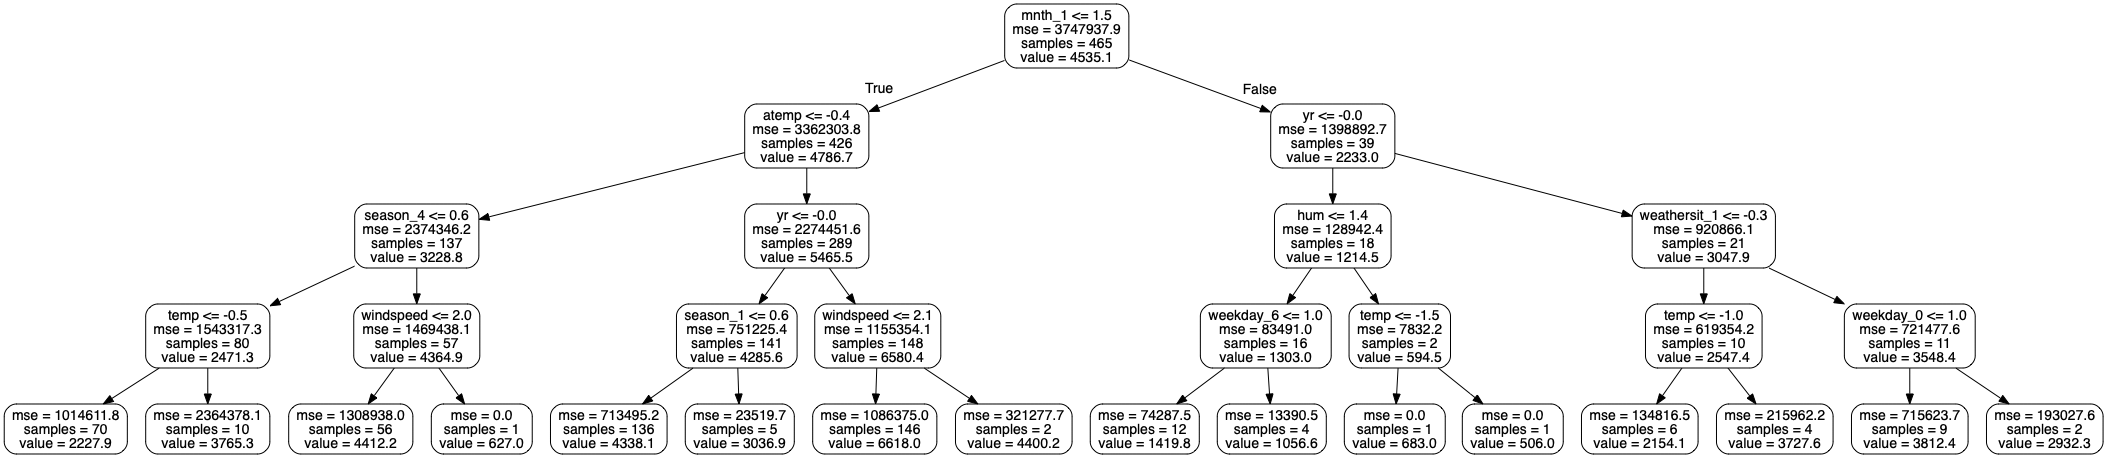

In [43]:
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

tree = rf_viz.estimators_[1]
export_graphviz(tree, out_file = 'tree.dot', feature_names = xs_onehot.columns, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
Image(graph.create_png())

In [44]:
rf_optim = RandomForestRegressor(n_estimators=160, max_features=0.4, max_depth=22, random_state=42, oob_score=True)
rf_optim.fit(xs_onehot_standard, ys)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=22, max_features=0.4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=160, n_jobs=None, oob_score=True,
                      random_state=42, verbose=0, warm_start=False)

In [45]:
rf_optim.score(xs_onehot_standard, ys)

0.983901464979415

In [46]:
rf_optim.oob_score_

0.882875007682345